## Problem 3 - Multi-dimensional Gaussians

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

A) Write a function samples = ndRandn(mean, cov, num) that generates a set of samples drawn from an N-dimensional Gaussian distribution with the specified mean (an N-vector) and covariance (an NxN matrix). Please use mean μ = [4,5] with CX = [9,−5; −5,6] to sample and scatterplot 1,000 points to verify your function work as intended.

(1000, 2)


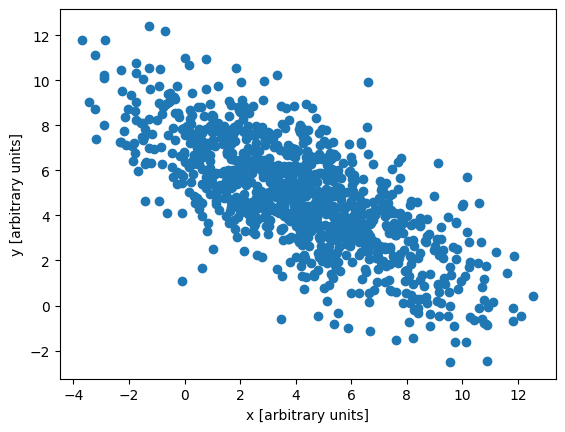

In [3]:
def transform(mean,cov,data):
    l, U = np.linalg.eig(cov)
    l_sqrt = np.diag(np.sqrt(l))
    M = U @ l_sqrt
    transform_data = np.zeros((len(data),len(mean)))
    for i in range(len(data)):
        transform_data[i,:] = M @ data[i,:] + mean
    return transform_data

def ndRandn(mean,cov,num=1):
    dim = len(mean)
    samples_W = np.random.multivariate_normal(np.zeros(dim), np.identity(dim), size=num) #Sampling from a N-dimensional Gaussian with zero mean and identity covariance
    # Transform samples to have desired mean and cov Y=M*X+b
    # b = mean
    # M = U*(l^1/2)
    samples = transform(mean,cov,samples_W)
    return samples
# Test function with 2D data
mean = np.array([4,5])
cov = np.array([[9,-5],[-5,6]])
samples= ndRandn(mean,cov,1000)
print(np.shape(samples)) # [num samples,dimensionality]
plt.scatter(samples[:,0],samples[:,1])
plt.xlabel('x [arbitrary units]')
plt.ylabel('y [arbitrary units]')
plt.show()


B) Now consider the marginal distribution of a generalized 2-D Gaussian with mean μ and covariance Σ in which samples are projected onto a unit vector $\hat{u}$ to obtain a 1-D
distribution. Write a mathematical expression for the mean, $\hat{μ}$, and variance, $\hat{σ}^2$, of this marginal distribution as a function of $\hat{u}$ and check it for a set of 48 unit vectors spaced evenly around the unit circle. For each of these, compare the mean and variance pre-dicted from your mathematical expression to the sample mean and variance estimated by projecting your 1,000 samples from part (a) onto $\hat{u}$. Stem plot the mathematically computed mean and the sample mean (on the same plot), and also plot the mathematical variance and the sample variance.

Given $\overrightarrow{x}$ distributed normally with mean $μ_x$ and covariance $C_x$, the marginal distribution for any given unit vector $\hat{u}$ is defined by: 
* $ μ = \hat{u}^T μ_x$ 
* $ \hat{σ}^2 = \hat{u}^T C_x \hat{u} $

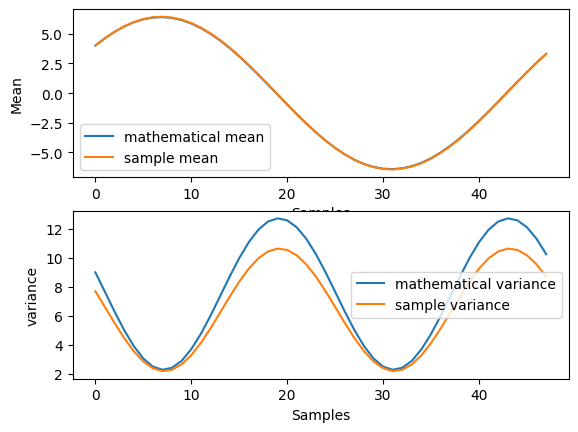

In [5]:
rad_steps= np.arange(0,2*np.pi*(1-(1/48)),2*np.pi/48)
u_x = np.cos(rad_steps)
u_y = np.sin(rad_steps)
u = np.stack((u_x,u_y))
math_mean = []
math_var = []
proj_mean = []
proj_var = []
for i in range(48):
    u_i = u[:,i]
    math_mean.append(u_i.T@mean)
    math_var.append(u_i.T@cov@u_i)
    projected_samples = []
    for j in range(1000): 
        projected_samples.append(np.dot(samples[j,:],u_i))
    proj_mean.append(np.mean(projected_samples))
    proj_var.append(np.var(projected_samples))  
x = np.arange(48)
plt.subplot(2,1,1)
plt.plot(x,math_mean,label = 'mathematical mean')
plt.plot(x,proj_mean,label = 'sample mean')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Mean')
plt.subplot(2,1,2)
plt.plot(x,math_var, label = 'mathematical variance')
plt.plot(x,proj_var, label = 'sample variance')
plt.xlabel('Samples')
plt.ylabel('variance')
plt.legend()

Now scatterplot 1,000 new samples of a 2-dimensional Gaussian using μ and CX in part (a). Measure the sample mean and covariance of your data points, comparing to
the values that you requested when calling the function. Plot an ellipse on top of the scatterplot by generating unit vectors equi-spaced around the circle, and transforming them with a matrix as in part (a) to have the same mean and covariance as the data. Try this on three additional random data sets with different means and covariance matrices. Does this ellipse capture the shape of the data?

[[ 9.18618897 -4.91437853]
 [-4.91437853  5.8083035 ]]
[3.98104943 5.04473428]


C:\Users\Juan Pablo Botero T\AppData\Local\Temp\ipykernel_27460\3183156287.py:3: RuntimeWarning: invalid value encountered in sqrt
  l_sqrt = np.diag(np.sqrt(l))
C:\Users\Juan Pablo Botero T\AppData\Local\Temp\ipykernel_27460\3183156287.py:3: RuntimeWarning: invalid value encountered in sqrt
  l_sqrt = np.diag(np.sqrt(l))


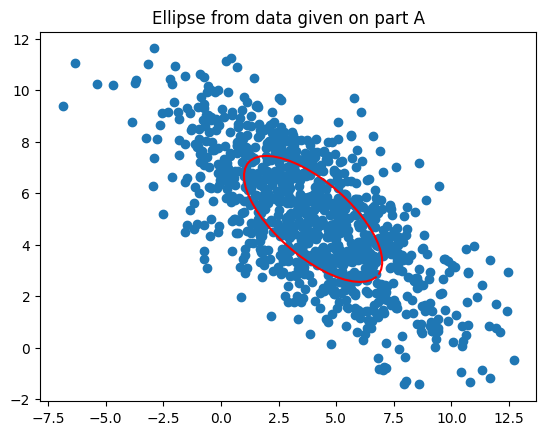

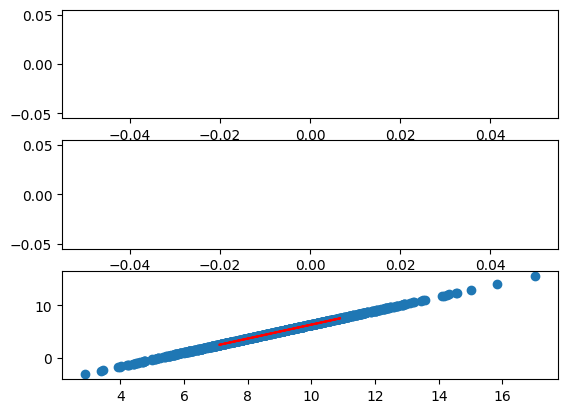

In [6]:
# New samples 
samples = ndRandn(mean,cov,1000)
sample_mean = np.mean(samples,axis=0)
sample_cov = np.cov(samples.T)
print(sample_cov)
print(sample_mean)
u_proj = transform(mean,cov,u.T)
plt.scatter(samples[:,0],samples[:,1])
plt.plot(u_proj[:,0],u_proj[:,1],'r')
plt.title('Ellipse from data given on part A')

# Scatter and Ellipse plot for 3 random 2D gaussians
fig,axs = plt.subplots(3,1)
for i in range(3): 
    mean_C = np.random.randint(10,size = (2,))
    cov_C= np.random.randint(10,size = (2,2))
    samples_C = ndRandn(mean_C,cov_C,1000)
    u_proj_C = transform(mean_C,cov_C,u.T)
    axs[i].scatter(samples_C[:,0],samples_C[:,1])
    axs[i].plot(u_proj_C[:,0],u_proj_C[:,1],'r')
   

When comparing the sample mean and covariance compared to the expected (μ and CX) we observe that there are small errors, that can be due to computation error propagation.
Additionally, we observe that the transformed data does capture the shape of the data. 

D) How would you, mathematically, compute the direction (unit vector) that maximizes the variance of the marginal distribution? Compute this direction and verify that it consistent with your plot. 

A mathematical solution for computing this directions is by applying SVD decomposition and taking the first column of the V matrix, which gives the direction of maximal spread as it has been thoroughly discussed in the section 1 of the course.

[-0.63207115  0.77491036]


Text(0.5, 1.0, 'Direction ')

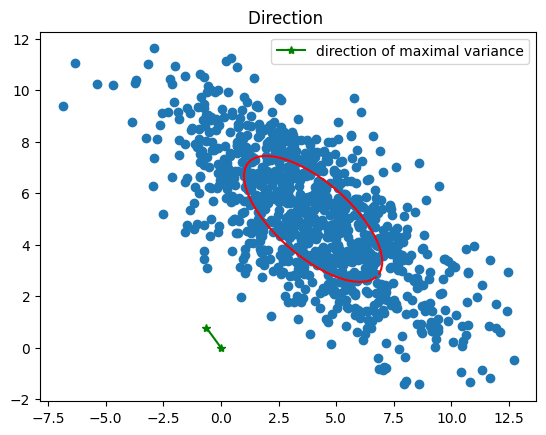

In [7]:
# Apply SVD to confirm mathematical solution
U,S,V = la.svd(samples,full_matrices=True, compute_uv=True)
max_var_direction = np.transpose(V)[0,:]
print(max_var_direction)
plt.plot([0,max_var_direction[0]],[0,max_var_direction[1]],'*-',color ='g',label='direction of maximal variance')
plt.scatter(samples[:,0],samples[:,1])
plt.plot(u_proj[:,0],u_proj[:,1],'r')
plt.legend()
plt.title('Direction ')